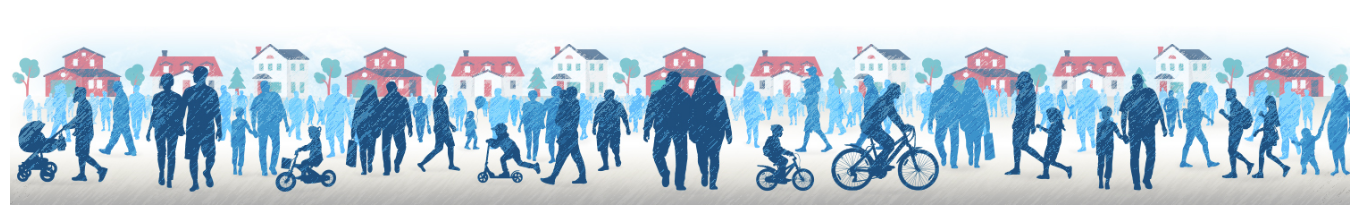

#OBJECTIVE: Life Expectancy Prediction
The primary objective of this project is to develop a robust predictive model for life expectancy using a comprehensive dataset of health and economic indicators, including factors such as adult mortality, infant and under-five deaths, disease prevalence (e.g., Hepatitis B, Measles, Polio, HIV/AIDS), lifestyle factors (e.g., Alcohol, BMI, thinness), healthcare expenditure, GDP, population demographics, income composition, and schooling. This model aims to identify the key determinants of life expectancy and provide insights into public health strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/led.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# REMOVING extra spaces
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Key points from the provided descriptive statistics:

##Data Coverage & Missingness:

Significant missingness is observed in 'Total expenditure' (2712 entries), 'GDP' (2286 entries), 'Population' (2490 entries), 'Hepatitis B' (2385 entries), and 'thinness 1-19 years' (2771 entries) and 'thinness 5-9 years' (2775 entries). This missing data will need to be addressed before modeling.

##Life Expectancy:

Mean life expectancy is 69.22 years, with a range from 36.3 to 89.0 years, indicating substantial global disparities.
The standard deviation of 9.52 suggests a notable spread in life expectancy across the dataset.
Mortality Indicators:

##Adult Mortality:

Mean is 164.79 deaths per 1000 population, ranging from 1 to 723. This also shows wide variations.

##Infant deaths:

Mean is 30.30, but the maximum is 1800, highlighting some extreme cases of high infant mortality. The standard deviation of 117.92 also points to a highly skewed distribution.

##Under-five deaths:

Similar to infant deaths, with a mean of 42.03 and a maximum of 2500, indicating severe disparities in child survival.

##HIV/AIDS:

The mean is relatively low (1.74), but the maximum of 50.6 suggests some regions are severely impacted.

##Health & Lifestyle Factors:

##Alcohol Consumption:

Mean is 4.60 liters, with a maximum of 17.87, showing a wide range of consumption levels.
BMI: Mean is 38.32, but it has a very wide range, from 1.0 to 87.3, suggesting a broad spectrum of nutritional statuses.

##Thinness (1-19 years and 5-9 years):

Means are around 4.8%, with maximums reaching 27.7% and 28.6% respectively, indicating significant prevalence of undernourishment in certain areas.

##Hepatitis B, Measles, Polio, Diphtheria:

The mean values vary, but the maximums for Measles (212183) are particularly striking, indicating large outbreaks in some instances. The high standard deviation for Measles confirms this variability.
Economic and Social Indicators:

##Percentage expenditure:

Mean is 738.25, with a massive range up to 19479.91, indicating huge differences in health expenditure as a percentage of GDP.

##Total expenditure:

Mean is 5.93%, with a maximum of 17.6%, also showing variability in healthcare spending.
GDP: Very wide range, from 1.68 to over 119,000, reflecting the vast economic differences between countries. The huge standard deviation (14270) highlights the extreme skewness of this variable.

##Population:

Extremely wide range from 34 to 1.29 billion, as expected for a global dataset.
Income composition of resources: Mean is 0.62, ranging from 0 to 0.948. This variable, often representing human development index, shows a good spread from very low to very high.
##Schooling:

Mean is 11.99 years, with a range from 0 to 20.7, reflecting diverse educational attainment levels.
##Overall:
The data reveals significant global disparities across almost all health, economic, and social indicators. The wide ranges and large standard deviations for many variables (e.g., mortality rates, disease prevalence, economic indicators) underscore the heterogeneity of the included countries.

The substantial missing data in several key columns, particularly GDP, population, and total expenditure, will require careful handling during the data preparation phase.

In [7]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


# Fill NA

In [8]:
df['Alcohol'].fillna(df['Alcohol'].median(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Polio'].fillna(df['Polio'].median(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].median(), inplace=True)
df['Diphtheria'].fillna(df['Diphtheria'].median(), inplace=True)
df['GDP'].fillna(df['GDP'].median(), inplace=True)
df['Population'].fillna(df['Population'].median(), inplace=True)
df['thinness 1-19 years'].fillna(df['thinness 1-19 years'].median(), inplace=True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].median(), inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].median(), inplace=True)
df['Schooling'].fillna(df['Schooling'].median(), inplace=True)
df['Life expectancy'].fillna(df['Life expectancy'].median(), inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].median(), inplace=True)

In [9]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [10]:
df.duplicated().sum()

np.int64(0)

#Mapping Categorical Variables

In [11]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [12]:
status_mapping = {'Developing': 0, 'Developed': 1}

# Apply the mapping to the 'Status' column
df['Status'] = df['Status'].map(status_mapping)

print("The 'Status' column has been numerically mapped.")
print(df['Status'].value_counts())


The 'Status' column has been numerically mapped.
Status
0    2426
1     512
Name: count, dtype: int64


In [13]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

# Converting Countries into region for one-hot encoding

In [14]:
country_to_region_dict = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cabo Verde': 'Africa', 'Cameroon': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa',
    "Côte d'Ivoire": 'Africa', 'Democratic Republic of the Congo': 'Africa', 'Djibouti': 'Africa',
    'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa',
    'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa',
    'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Morocco': 'Africa',
    'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa', 'Senegal': 'Africa', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa',
    'Sudan': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa', 'Uganda': 'Africa',
    'United Republic of Tanzania': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Cyprus': 'Asia', "Democratic People's Republic of Korea": 'Asia',
    'Georgia': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia',
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia',
    'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia',
    'Myanmar': 'Asia', 'Nepal': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Republic of Korea': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia',
    'Sri Lanka': 'Asia', 'Syrian Arab Republic': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia',
    'Timor-Leste': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia', 'United Arab Emirates': 'Asia',
    'Uzbekistan': 'Asia', 'Viet Nam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe', 'Czechia': 'Europe',
    'Denmark': 'Europe', 'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe',
    'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe', 'Iceland': 'Europe',
    'Ireland': 'Europe', 'Italy': 'Europe', 'Latvia': 'Europe', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Malta': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Republic of Moldova': 'Europe', 'Romania': 'Europe',
    'Russian Federation': 'Europe', 'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Ukraine': 'Europe', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',

    # North America
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America', 'Barbados': 'North America',
    'Belize': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America',
    'Cuba': 'North America', 'Dominica': 'North America', 'Dominican Republic': 'North America',
    'El Salvador': 'North America', 'Grenada': 'North America', 'Guatemala': 'North America',
    'Haiti': 'North America', 'Honduras': 'North America', 'Jamaica': 'North America',
    'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Trinidad and Tobago': 'North America',
    'United States of America': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia (Plurinational State of)': 'South America',
    'Brazil': 'South America', 'Chile': 'South America', 'Colombia': 'South America',
    'Ecuador': 'South America', 'Guyana': 'South America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Suriname': 'South America', 'Uruguay': 'South America',
    'Venezuela (Bolivarian Republic of)': 'South America',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Kiribati': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia (Federated States of)': 'Oceania', 'Nauru': 'Oceania', 'New Zealand': 'Oceania',
    'Palau': 'Oceania', 'Papua New Guinea': 'Oceania', 'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania', 'Tonga': 'Oceania', 'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania',
    'Cook Islands': 'Oceania', 'Niue': 'Oceania',
}

# 1. Create the 'Region' column by mapping 'Country' names
df['Region'] = df['Country'].map(country_to_region_dict)

# 2. Check for any unmapped countries and handle them (fill with 'Unknown' if necessary)
if df['Region'].isnull().any():
    unmapped_countries = df.loc[df['Region'].isnull(), 'Country'].unique()
    print(f"\nWarning: The following countries were not found in the mapping and will be set to 'Unknown':\n{unmapped_countries.tolist()}")
    df['Region'].fillna('Unknown', inplace=True)
else:
    print("\nAll countries successfully mapped to a region.")

# 3. Drop the original 'Country' column
df = df.drop('Country', axis=1)

# 4. One-Hot Encode the new 'Region' column
df = pd.get_dummies(df, columns=['Region'], prefix='Region', drop_first=True)

print("\n'Country' column replaced by one-hot encoded 'Region' columns.")
print("New columns in DataFrame:")
print(df.columns.tolist())


['Swaziland', 'The former Yugoslav republic of Macedonia']

'Country' column replaced by one-hot encoded 'Region' columns.
New columns in DataFrame:
['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America', 'Region_Unknown']


#SKEWNESS

In [15]:
from scipy.stats import skew as sk
skewness = df.select_dtypes(include='number').apply(sk)
def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"
skew_results = pd.DataFrame({
    'Skewness Value': skewness,
    'Skewness Category': skewness.apply(skew_category),
    'Direction': skewness.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})

print(skew_results)

                                 Skewness Value        Skewness Category  \
Year                                  -0.006406  Approximately Symmetric   
Status                                 1.717361            Highly Skewed   
Life expectancy                       -0.642063        Moderately Skewed   
Adult Mortality                        1.177298            Highly Skewed   
infant deaths                          9.781965            Highly Skewed   
Alcohol                                0.649246        Moderately Skewed   
percentage expenditure                 4.649676            Highly Skewed   
Hepatitis B                           -2.280532            Highly Skewed   
Measles                                9.436511            Highly Skewed   
BMI                                   -0.229040  Approximately Symmetric   
under-five deaths                      9.490216            Highly Skewed   
Polio                                 -2.107833            Highly Skewed   
Total expend

# Transformation

In [16]:
from scipy import stats
from scipy.stats import skew as sk, yeojohnson

In [17]:
# Excluding 'Year', 'Life expectancy' (target), and 'Status' (categorical)
skewed_vars = [
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'percentage expenditure',
    'Hepatitis B',
    'Measles',
    'BMI',
    'under-five deaths',
    'Polio',
    'Total expenditure',
    'Diphtheria',
    'HIV/AIDS',
    'GDP',
    'Population',
    'thinness 1-19 years',
    'thinness 5-9 years',
    'Income composition of resources',
    'Schooling'
]

# Final function to apply transformations, print checks, and store results
def apply_all_transforms(df, skewed_vars):
    results = []

    # Store the original column names to decide later whether to use transformed or original
    original_columns_list = df.columns.tolist()

    for var in skewed_vars:
        # Check if the column exists and is numeric
        if var not in df.columns or not pd.api.types.is_numeric_dtype(df[var]):
            print(f"Skipping {var}: Not found or not numeric.")
            continue

        original_skew = df[var].skew()
        result = {
            'Variable': var,
            'Original Skew': original_skew,
            'Log1p Skew': None,
            'Sqrt Skew': None,
            'Box-Cox Skew': None,
            'Yeo-Johnson Skew': None
        }

        is_positive = (df[var] > 0).all()
        is_non_negative = (df[var] >= 0).all()

        print(f"\n--- Processing '{var}' ---")
        # Show Box-Cox warning
        if not is_positive:
            print(f"⚠️ {var} has non-positive values. Box-Cox is not suitable (use Yeo-Johnson).")
        else:
            print(f"✅ {var} is safe for Box-Cox.")

        # Apply Log1p Transform (safer for non-negative data including zeros)
        if is_non_negative: # Log1p works for non-negative data (including 0)
            log1p_transformed = np.log1p(df[var])
            result['Log1p Skew'] = log1p_transformed.skew()
            df[var + '_log1p'] = log1p_transformed # Storing new column
        else:
            result['Log1p Skew'] = "N/A (negative data)"
            print(f"🚫 {var} has negative values. Log1p is not suitable.")


        # Apply Sqrt Transform
        if is_non_negative:
            sqrt_transformed = np.sqrt(df[var])
            result['Sqrt Skew'] = sqrt_transformed.skew()
            df[var + '_sqrt'] = sqrt_transformed # Store new column
        else:
            result['Sqrt Skew'] = "N/A (negative data)"
            print(f"🚫 {var} has negative values. Square Root is not suitable.")

        # Apply Box-Cox Transform
        if is_positive:

            try:
                boxcox_transformed, _ = stats.boxcox(df[var])
                result['Box-Cox Skew'] = pd.Series(boxcox_transformed).skew()
                df[var + '_boxcox'] = boxcox_transformed # Store new column
            except Exception as e:
                result['Box-Cox Skew'] = f"Error: {e}"
                print(f"🚫 Error applying Box-Cox to {var}: {e}")
        else:
            result['Box-Cox Skew'] = "N/A (non-positive data)"

        # Apply Yeo-Johnson Transform (handles positive, negative, and zero values)
        yj_transformed, _ = stats.yeojohnson(df[var])
        df[var + '_yj'] = yj_transformed  # Store new column
        result['Yeo-Johnson Skew'] = pd.Series(yj_transformed).skew()

        results.append(result)

    return df, pd.DataFrame(results).set_index("Variable")

# Apply everything in one step
df, df_transformed_results = apply_all_transforms(df, skewed_vars)

# Check transformed summary
print("\n--- Skewness Results for Different Transformations ---")
print(df_transformed_results)



--- Processing 'Adult Mortality' ---
✅ Adult Mortality is safe for Box-Cox.

--- Processing 'infant deaths' ---
⚠️ infant deaths has non-positive values. Box-Cox is not suitable (use Yeo-Johnson).

--- Processing 'Alcohol' ---
✅ Alcohol is safe for Box-Cox.

--- Processing 'percentage expenditure' ---
⚠️ percentage expenditure has non-positive values. Box-Cox is not suitable (use Yeo-Johnson).

--- Processing 'Hepatitis B' ---
✅ Hepatitis B is safe for Box-Cox.

--- Processing 'Measles' ---
⚠️ Measles has non-positive values. Box-Cox is not suitable (use Yeo-Johnson).

--- Processing 'BMI' ---
✅ BMI is safe for Box-Cox.

--- Processing 'under-five deaths' ---
⚠️ under-five deaths has non-positive values. Box-Cox is not suitable (use Yeo-Johnson).

--- Processing 'Polio' ---
✅ Polio is safe for Box-Cox.

--- Processing 'Total expenditure' ---
✅ Total expenditure is safe for Box-Cox.

--- Processing 'Diphtheria' ---
✅ Diphtheria is safe for Box-Cox.

--- Processing 'HIV/AIDS' ---
✅ HIV/

# Finallized Columns to Keep

In [18]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_Oceania', 'Region_South America', 'Region_Unknown',
       'Adult Mortality_log1p', 'Adult Mortality_sqrt',
       'Adult Mortality_boxcox', 'Adult Mortality_yj', 'infant deaths_log1p',
       'infant deaths_sqrt', 'infant deaths_yj', 'Alcohol_log1p',
       'Alcohol_sqrt', 'Alcohol_boxcox', 'Alcohol_yj',
       'percentage expenditure_log1p', 'percentage expenditure_sqrt',
       'percentage expenditure_yj', 'Hepatitis B_log1p', 'Hepatitis B_sqrt',
       'Hepatitis B_boxcox', 'Hepatitis B_yj', 'Measles_log1p', 'Measles_sqrt',
       'Measles_yj'

In [19]:
columns_to_keep_map = {
    'Year': 'Year',
    'Status': 'Status',
    'Life expectancy': 'Life expectancy',

    # Transformed numerical features
    'Adult Mortality': 'Adult Mortality_yj',
    'infant deaths': 'infant deaths_yj',
    'Alcohol': 'Alcohol_yj',
    'percentage expenditure': 'percentage expenditure_yj',
    'Hepatitis B': 'Hepatitis B_yj',
    'Measles': 'Measles_yj',
    'BMI': 'BMI_yj',
    'under-five deaths': 'under-five deaths_yj',
    'Polio': 'Polio_yj',
    'Total expenditure': 'Total expenditure_yj',
    'Diphtheria': 'Diphtheria_yj',
    'HIV/AIDS': 'HIV/AIDS_boxcox',
    'GDP': 'GDP_boxcox',
    'Population': 'Population_yj',
    'thinness 1-19 years': 'thinness 1-19 years_yj',
    'thinness 5-9 years': 'thinness 5-9 years_yj',
    'Income composition of resources': 'Income composition of resources_yj',
    'Schooling': 'Schooling_yj',

    # Include the one-hot encoded Region columns
    'Region_Asia': 'Region_Asia',
    'Region_Europe': 'Region_Europe',
    'Region_North America': 'Region_North America',
    'Region_Oceania': 'Region_Oceania',
    'Region_South America': 'Region_South America',
    'Region_Unknown': 'Region_Unknown'
}

# 1. Select the columns based on the values in columns_to_keep_map
df_clean = df[list(columns_to_keep_map.values())].copy()

# 2. Create a reversed dictionary for renaming: {current_name: new_name}
# This maps the transformed column names back to their original base names for clarity.
rename_dict = {v: k for k, v in columns_to_keep_map.items()}
df_clean.rename(columns=rename_dict, inplace=True)

# Display the new, cleaner DataFrame's columns and info
print("--- Cleaned DataFrame Columns ---")
print(df_clean.columns.tolist())
print("\n--- Cleaned DataFrame Info (showing reduced columns) ---")
df_clean.info()

# Replace main DataFrame 'df' with the cleaned 'df_clean' for subsequent steps
df = df_clean.copy()

# --- Re-check Skewness  ---
def categorize_skew(value):
    if abs(value) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(value) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

current_skewness_final = df.select_dtypes(include=np.number).apply(sk)
skewness_report_final = pd.DataFrame({
    'Skewness Value': current_skewness_final,
    'Skewness Category': current_skewness_final.apply(categorize_skew),
    'Direction': current_skewness_final.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})

print("\n--- Skewness Status of Final Cleaned Numerical Columns ---")
print(skewness_report_final)
print("-" * 60)

--- Cleaned DataFrame Columns ---
['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America', 'Region_Unknown']

--- Cleaned DataFrame Info (showing reduced columns) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  29

# 2nd Transformation as Hepatitis B , Polio and Diphtheria are stilll highly skewed

In [20]:
problematic_neg_skew_cols = ['Hepatitis B', 'Polio', 'Diphtheria']
problematic_pos_skew_cols = ['HIV/AIDS']

print("\n--- Attempting more aggressive transformations for specific columns ---")

for col in problematic_neg_skew_cols:
    if col in df.columns:
        actual_max_val = df[col].max()
        reflection_point = actual_max_val + 1e-6

        reflected_data = reflection_point - df[col] # Invert the data

        # Apply Yeo-Johnson to the reflected data
        transformed_data, _ = yeojohnson(reflected_data)

        # Calculate skewness of the new transformed data
        new_skew = pd.Series(transformed_data).skew()
        original_skew_val = df[col].skew()

        print(f"'{col}': Original Skew = {original_skew_val:.3f}, Reflected YJ Skew = {new_skew:.3f}")

        # Decide whether to replace the original column with this new transformed version
        if abs(new_skew) < abs(original_skew_val):
            print(f"  --> Replacing '{col}' with its reflected YJ version due to improved skewness.")
            df[col] = transformed_data # OVERWRITE THE ORIGINAL COLUMN with the improved version
        else:
            print(f"  --> Reflected YJ did NOT significantly improve skewness for '{col}'. Keeping current version.")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame for transformation.")

# For HIV/AIDS

if 'HIV/AIDS' in df.columns:
    print(f"\n'HIV/AIDS' (Skew: {df['HIV/AIDS'].skew():.3f}) is moderately skewed. Often acceptable.")


# --- Re-run the final skewness report after these new transformations ---
print("\n--- Final Skewness Status AFTER potential additional transformations ---")

def categorize_skew(value):
    if abs(value) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(value) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

# Calculate skewness for all numerical columns
current_skewness_final_v2 = df.select_dtypes(include=np.number).apply(sk)
skewness_report_final_v2 = pd.DataFrame({
    'Skewness Value': current_skewness_final_v2,
    'Skewness Category': current_skewness_final_v2.apply(categorize_skew),
    'Direction': current_skewness_final_v2.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})

print(skewness_report_final_v2)
print("-" * 60)


--- Attempting more aggressive transformations for specific columns ---
'Hepatitis B': Original Skew = -1.165, Reflected YJ Skew = -0.432
  --> Replacing 'Hepatitis B' with its reflected YJ version due to improved skewness.
'Polio': Original Skew = -1.028, Reflected YJ Skew = -0.479
  --> Replacing 'Polio' with its reflected YJ version due to improved skewness.
'Diphtheria': Original Skew = -1.044, Reflected YJ Skew = -0.462
  --> Replacing 'Diphtheria' with its reflected YJ version due to improved skewness.

'HIV/AIDS' (Skew: 0.680) is moderately skewed. Often acceptable.

--- Final Skewness Status AFTER potential additional transformations ---
                                 Skewness Value        Skewness Category  \
Year                                  -0.006406  Approximately Symmetric   
Status                                 1.717361            Highly Skewed   
Life expectancy                       -0.642063        Moderately Skewed   
Adult Mortality                       -0.

In [21]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_Oceania', 'Region_South America', 'Region_Unknown'],
      dtype='object')

# Outliers

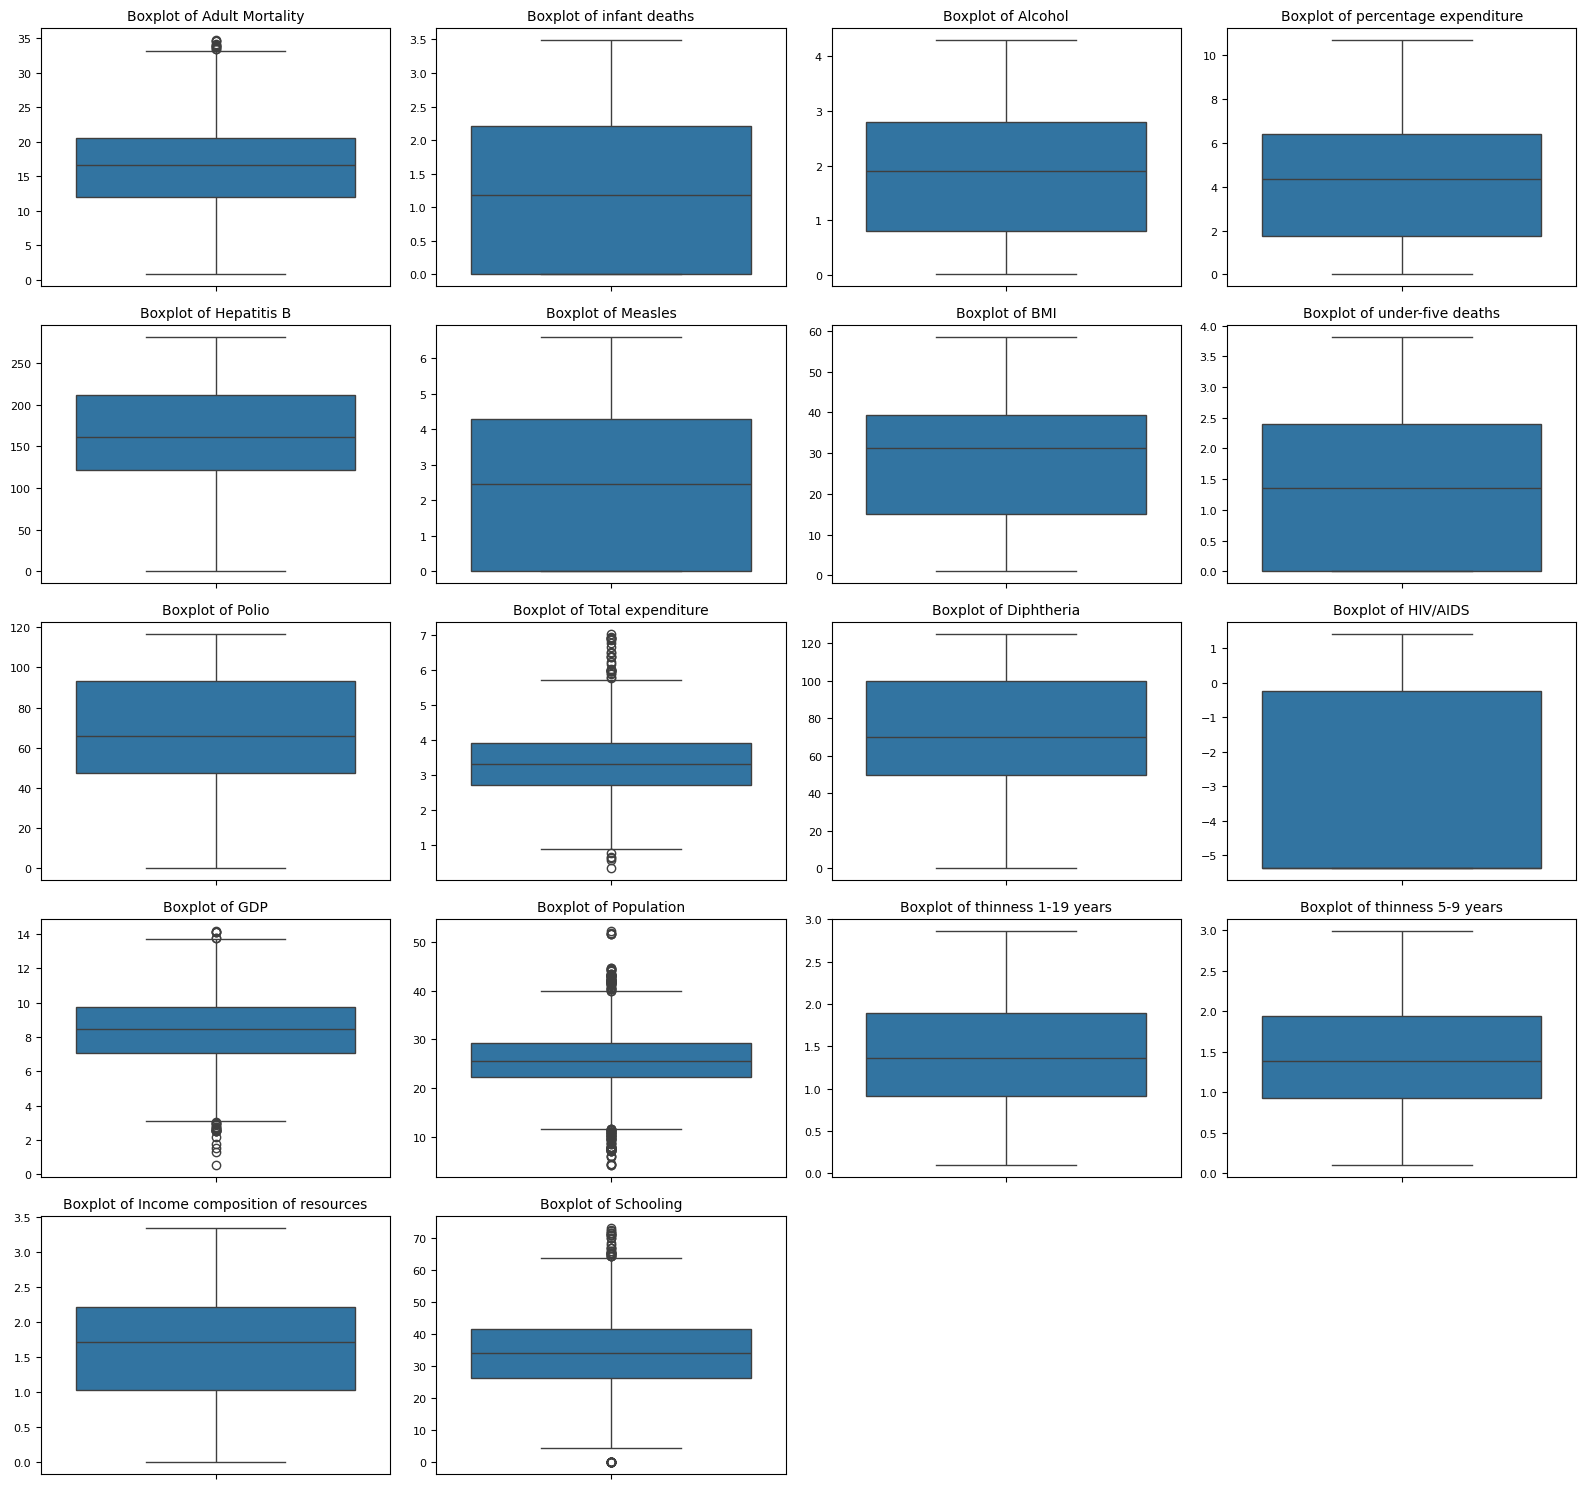

In [22]:
numerical_features_for_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness 1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Ensure we only try to plot columns that actually exist in the DataFrame
numerical_features_for_outliers = [
    col for col in numerical_features_for_outliers if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
]

# Set up the plotting grid dynamically based on the number of features
num_features = len(numerical_features_for_outliers)
# Calculate number of rows needed for the subplots
num_cols_per_row = 4 # You can adjust this for better visualization
num_rows = (num_features + num_cols_per_row - 1) // num_cols_per_row # Ceiling division

plt.figure(figsize=(num_cols_per_row * 4, num_rows * 3)) # Adjust figure size

for i, col in enumerate(numerical_features_for_outliers):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.ylabel('') # Remove y-axis label to save space
    plt.yticks(fontsize=8) # Adjust tick font size
plt.tight_layout()
plt.show()


#Capping Appied

In [23]:
columns_to_cap = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness 1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Ensure we only try to cap columns that actually exist and are numerical in the DataFrame
columns_to_cap = [
    col for col in columns_to_cap if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
]

def cap_outliers_iqr(df_input, columns):
    df_capped = df_input.copy()
    outliers_found = {}

    print("--- Applying IQR-based Capping to Outliers ---")
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before capping
        num_lower_outliers = (df_capped[col] < lower_bound).sum()
        num_upper_outliers = (df_capped[col] > upper_bound).sum()
        total_outliers = num_lower_outliers + num_upper_outliers

        if total_outliers > 0:
            # Apply capping
            df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
            df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
            print(f"  - '{col}': Capped {total_outliers} outliers ({num_lower_outliers} lower, {num_upper_outliers} upper).")
            outliers_found[col] = total_outliers
        else:
            print(f"  - '{col}': No outliers found (or very few, not requiring capping).")

    if not outliers_found:
        print("No significant outliers were found and capped in the specified columns.")
    print("--------------------------------------------------")
    return df_capped

# Apply the capping function to your DataFrame
df = cap_outliers_iqr(df, columns_to_cap)

--- Applying IQR-based Capping to Outliers ---
  - 'Adult Mortality': Capped 11 outliers (0 lower, 11 upper).
  - 'infant deaths': No outliers found (or very few, not requiring capping).
  - 'Alcohol': No outliers found (or very few, not requiring capping).
  - 'percentage expenditure': No outliers found (or very few, not requiring capping).
  - 'Hepatitis B': No outliers found (or very few, not requiring capping).
  - 'Measles': No outliers found (or very few, not requiring capping).
  - 'BMI': No outliers found (or very few, not requiring capping).
  - 'under-five deaths': No outliers found (or very few, not requiring capping).
  - 'Polio': No outliers found (or very few, not requiring capping).
  - 'Total expenditure': Capped 33 outliers (5 lower, 28 upper).
  - 'Diphtheria': No outliers found (or very few, not requiring capping).
  - 'HIV/AIDS': No outliers found (or very few, not requiring capping).
  - 'GDP': Capped 27 outliers (21 lower, 6 upper).
  - 'Population': Capped 120 ou

#RECHECK OUTLIERS

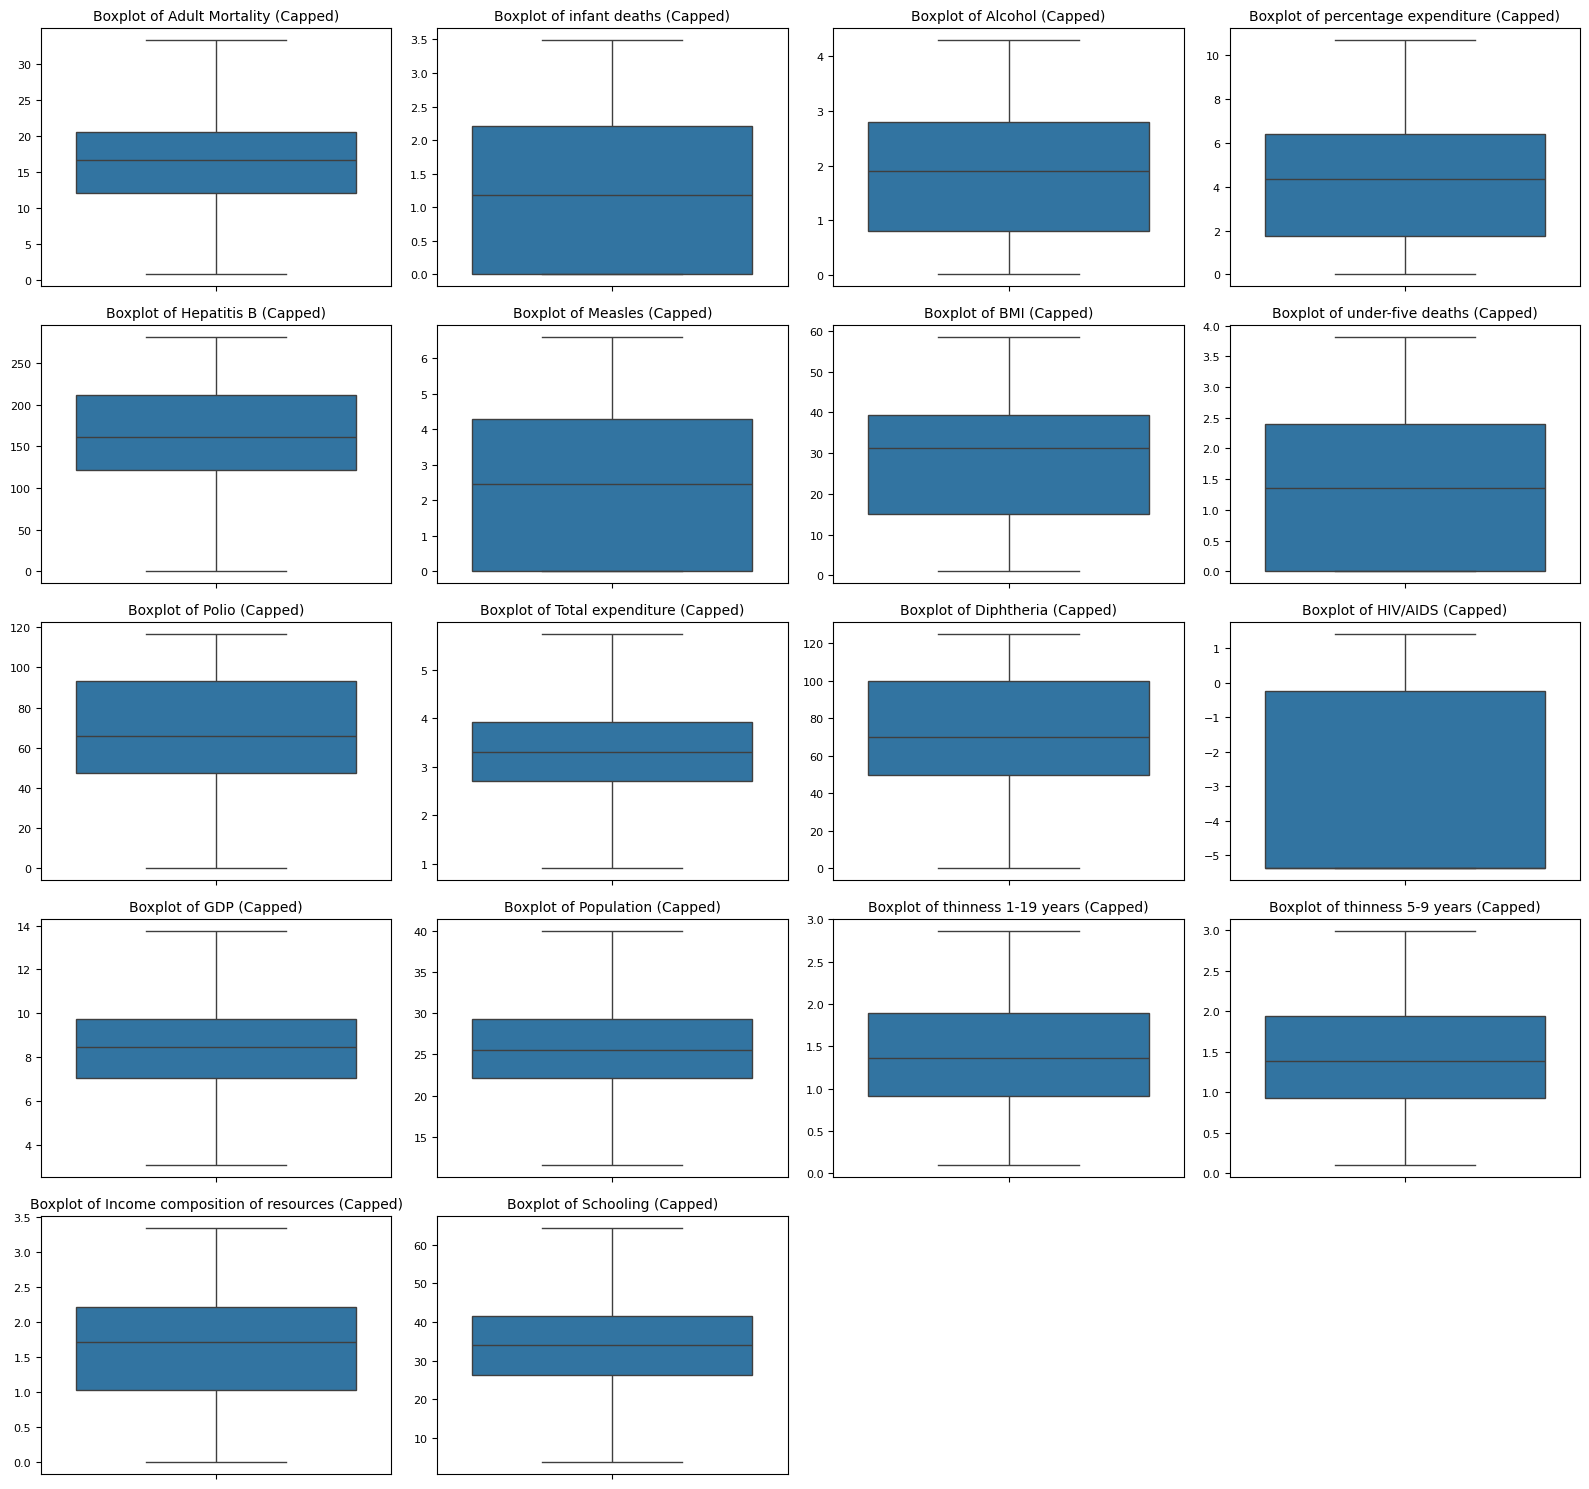

In [24]:

numerical_features_for_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness 1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]
numerical_features_for_outliers = [
    col for col in numerical_features_for_outliers if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
]

num_features = len(numerical_features_for_outliers)
num_cols_per_row = 4
num_rows = (num_features + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 4, num_rows * 3))

for i, col in enumerate(numerical_features_for_outliers):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Capped)', fontsize=10)
    plt.ylabel('')
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# UNI & MULTI-VARIATE ANALYSIS

In [25]:
target_column = 'Life expectancy'

numerical_features = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness 1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]
categorical_features = ['Status']

## Pearson Correlation with 'Life expectancy' (for numerical features)

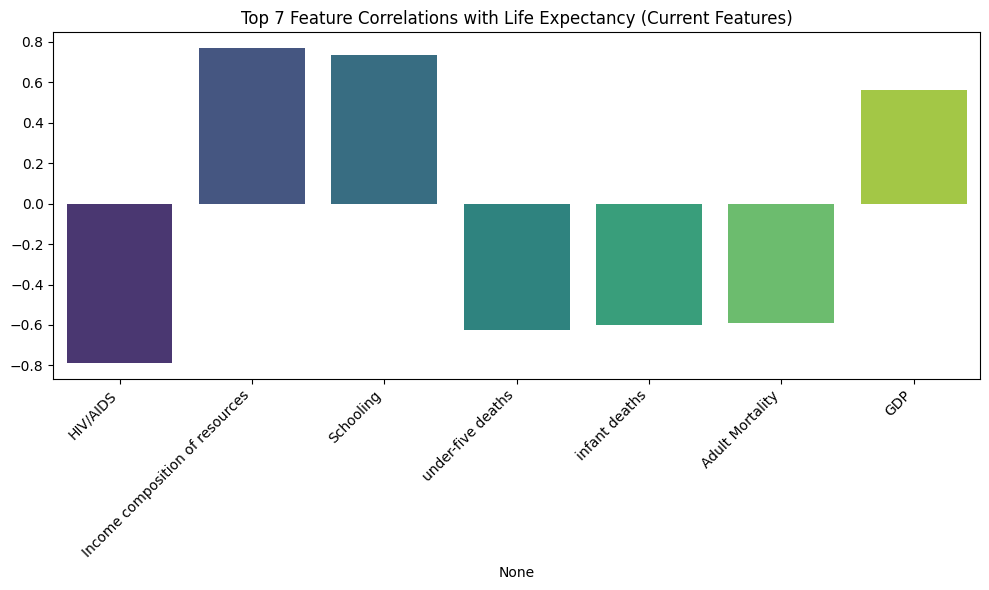

In [26]:
correlations_to_plot = df.select_dtypes(include=np.number).corrwith(df['Life expectancy']).sort_values(key=abs, ascending=False).drop('Life expectancy').head(7)

# Create and display the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_to_plot.index, y=correlations_to_plot.values, palette='viridis')
plt.title('Top 7 Feature Correlations with Life Expectancy (Current Features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Strong Negative Correlations (linked to worse outcomes):

HIV/AIDS: -0.79 – Strongest negative impact.

Under-five deaths: -0.62 – Indicates poor child health.

Infant deaths: -0.60 – Tied to lower survival in early life.

Adult Mortality: -0.59 – Higher adult deaths reduce overall life expectancy.

###Strong Positive Correlations (linked to better outcomes):

Income composition of resources: 0.77 – Better access to financial resources improves outcomes.

Schooling: 0.73 – Education strongly boosts life conditions.

GDP: 0.56 – Economic strength supports improved health or life expectancy.

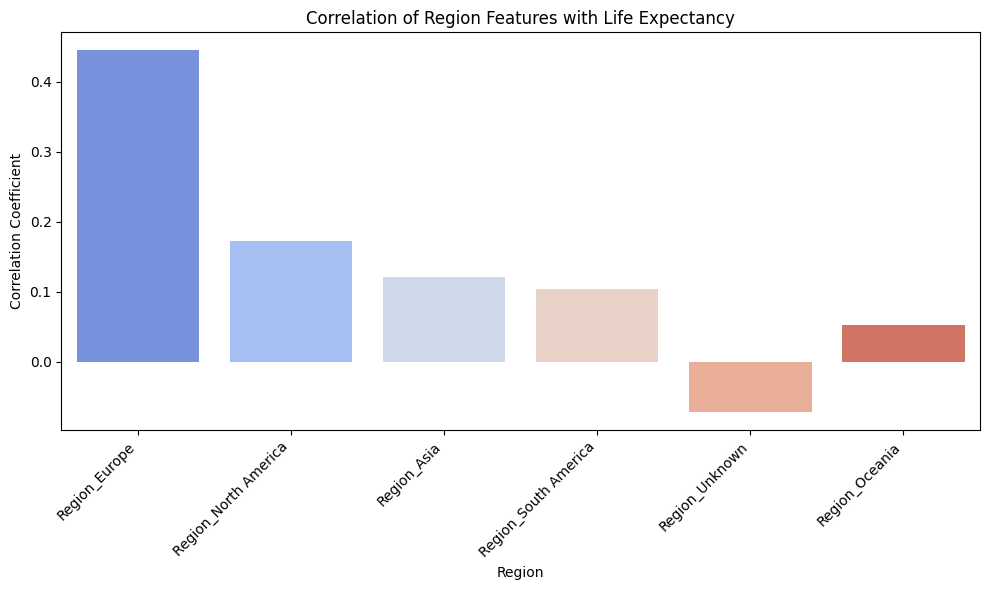

In [27]:
region_columns = [col for col in df.columns if col.startswith('Region_')]
region_correlations = df[region_columns].corrwith(df['Life expectancy']).sort_values(key=abs, ascending=False)

# Create and display the bar plot for region correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=region_correlations.index, y=region_correlations.values, palette='coolwarm')
plt.title('Correlation of Region Features with Life Expectancy')
plt.xlabel('Region')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Europe (0.45) shows the strongest positive correlation with the target.

North America (0.17) and Asia (0.12) have moderate positive influence.

South America (0.10) and Oceania (0.05) show weak positive effects.

Unknown region (-0.07) has a slight negative impact.

In [28]:
from sklearn.feature_selection import mutual_info_regression
print("\n--- Top 5 Mutual Information Scores with 'Life expectancy' ---")
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']
# Ensure X has no non-numeric columns remaining, and handle NaNs if any
X_mi = X.select_dtypes(include=np.number).fillna(X.median(numeric_only=True))
mi_scores = mutual_info_regression(X_mi, y)
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)
print(mi_series.head(5))


--- Top 5 Mutual Information Scores with 'Life expectancy' ---
Adult Mortality                    1.297195
Income composition of resources    0.914574
thinness 1-19 years                0.772519
thinness 5-9 years                 0.757934
Schooling                          0.679080
dtype: float64



--- Example: Distribution of 'Schooling' ---


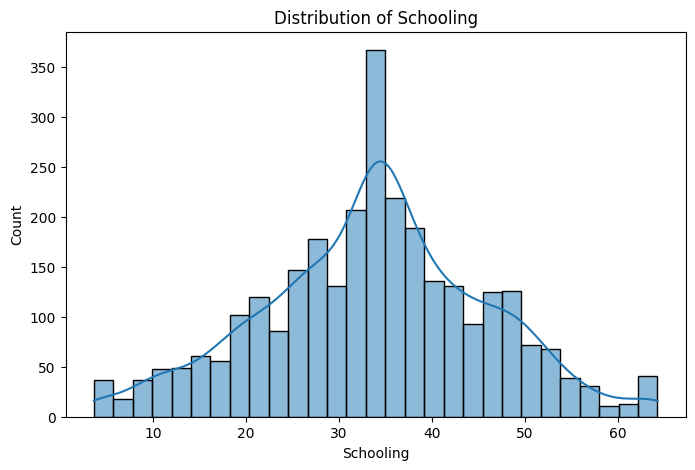

In [29]:
print("\n--- Example: Distribution of 'Schooling' ---")
plt.figure(figsize=(8, 5))
sns.histplot(df['Schooling'], kde=True)
plt.title('Distribution of Schooling')
plt.show()

In [30]:
print("\n--- Value Counts for 'Status' ---")
print(df['Status'].value_counts())


--- Value Counts for 'Status' ---
Status
0    2426
1     512
Name: count, dtype: int64



--- Scatter Plot of 'Income composition of resources' vs. 'Life expectancy' ---


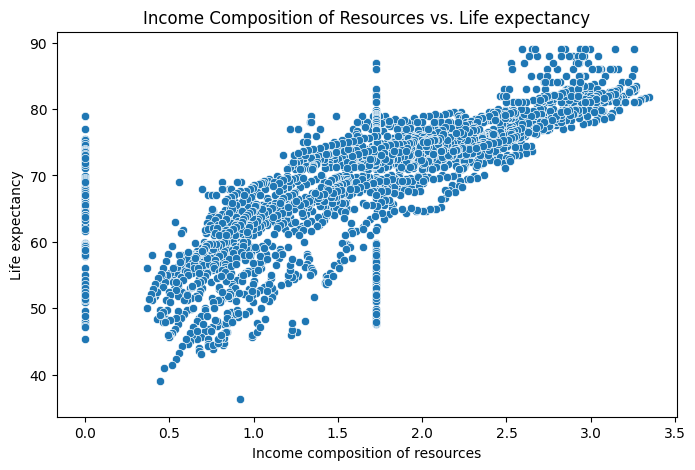

In [31]:
print("\n--- Scatter Plot of 'Income composition of resources' vs. 'Life expectancy' ---")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income composition of resources', y='Life expectancy', data=df)
plt.title('Income Composition of Resources vs. Life expectancy')
plt.show()

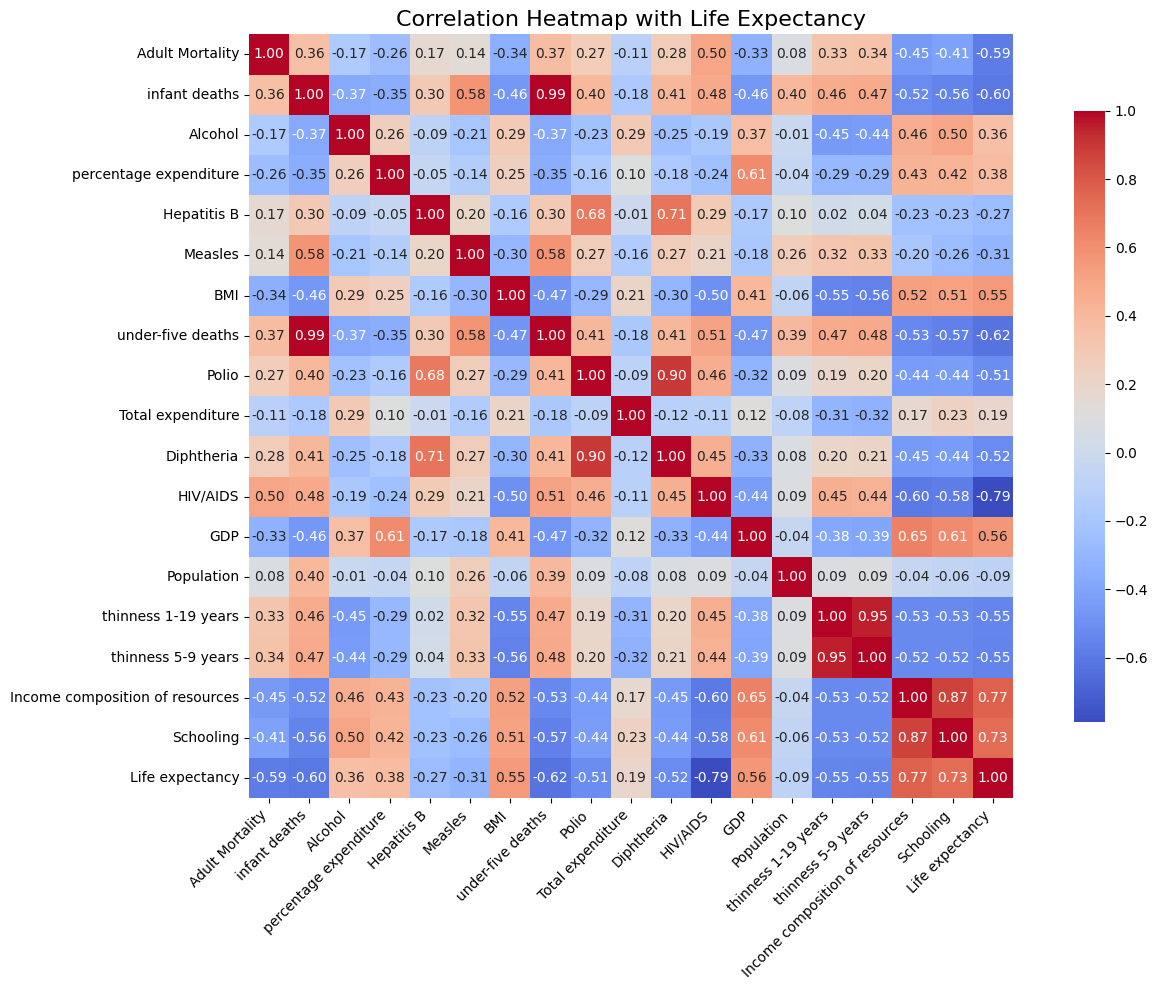

In [32]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_features + [target_column]].corr(),
            annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap with Life Expectancy', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


###Strong positive correlations:

Income composition of resources: 0.77

Schooling: 0.73

GDP: 0.56

BMI: 0.55

Moderate positive correlations:

Percentage expenditure: 0.38

Alcohol consumption: 0.36

###Strong negative correlations:

HIV/AIDS: -0.79

Under-five deaths: -0.62

Infant deaths: -0.60

Adult Mortality: -0.59

Thinness 5-9 years: -0.55

Thinness 1-19 years: -0.55

Diphtheria: -0.52

Polio: -0.51

###Moderate negative correlations:

Measles: -0.31

Hepatitis B: -0.27

Negligible correlation:

Population: -0.09

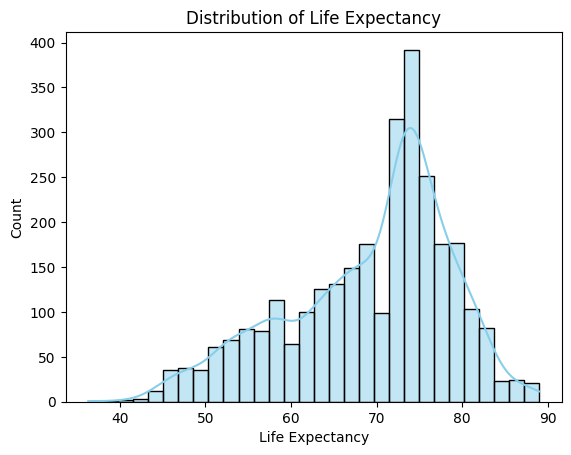

In [33]:
sns.histplot(df[target_column], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()


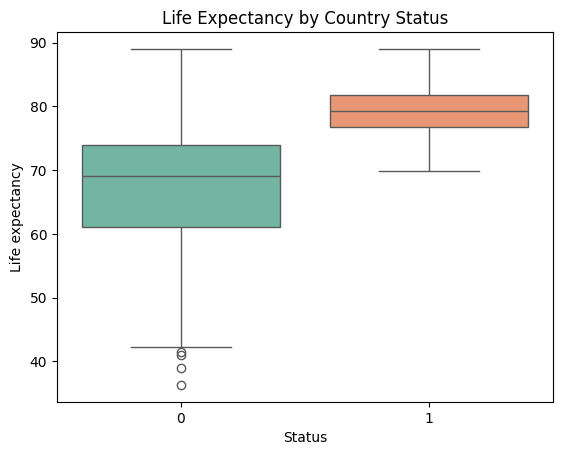

In [34]:
sns.boxplot(x='Status', y=target_column, data=df, palette='Set2')
plt.title('Life Expectancy by Country Status')
plt.show()


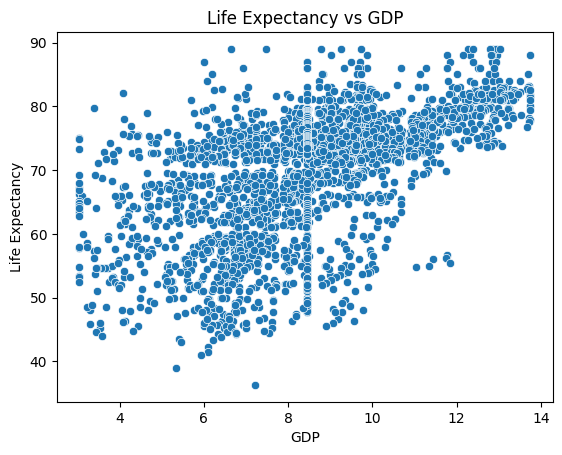

In [35]:
sns.scatterplot(x='GDP', y=target_column, data=df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()


# Multicollinearity Check (Variance Inflation Factor - VIF)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop('Life expectancy', axis=1).select_dtypes(include=np.number)

# Filter out any columns with zero variance, as VIF cannot be calculated for them
X = X.loc[:, X.var() != 0]

# Calculate VIF and store in a DataFrame
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Sort and print the VIF values
vif_data.sort_values(by='VIF', ascending=False, inplace=True)
print(vif_data)

                            feature         VIF
9                 under-five deaths  268.576550
3                     infant deaths  252.748697
0                              Year  117.969023
16              thinness 1-19 years   68.218674
17               thinness 5-9 years   65.397051
19                        Schooling   41.863095
14                              GDP   38.720821
12                       Diphtheria   29.611913
18  Income composition of resources   29.143254
10                            Polio   26.626226
15                       Population   22.244028
11                Total expenditure   15.495866
6                       Hepatitis B   12.993467
2                   Adult Mortality   10.234554
8                               BMI    9.436134
13                         HIV/AIDS    5.870012
4                           Alcohol    5.797182
5            percentage expenditure    5.140842
7                           Measles    3.923239
1                            Status    2


--- Top 10 Features by VIF (Visual) ---


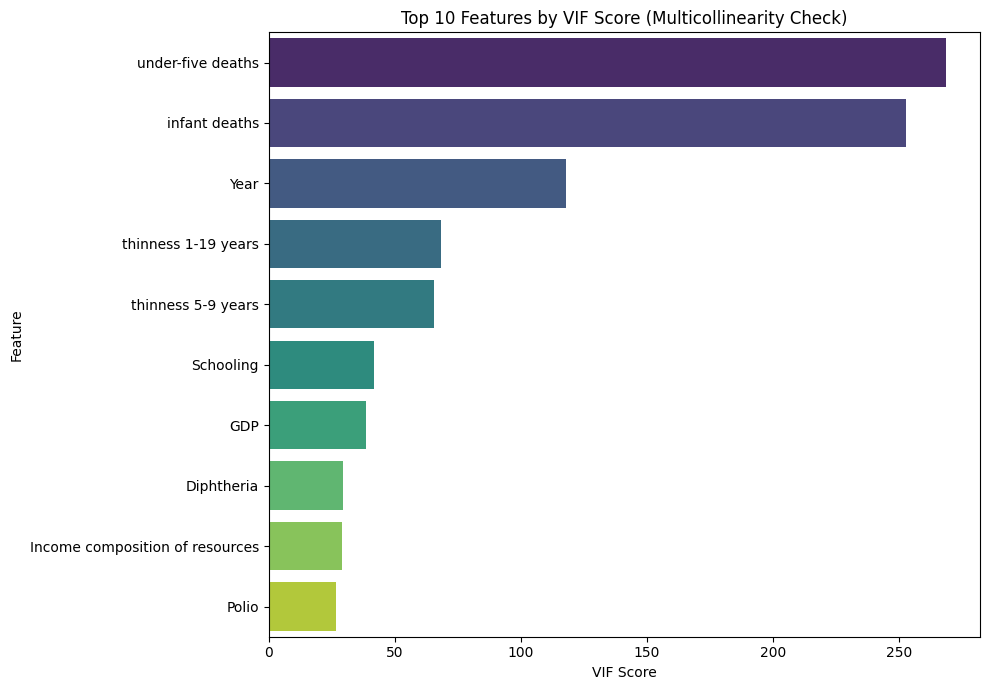

In [37]:
#Visualize VIF (Top 10 )
print("\n--- Top 10 Features by VIF (Visual) ---")
plt.figure(figsize=(10, 7))
sns.barplot(x='VIF', y='feature', data=vif_data.head(10), palette='viridis')
plt.title('Top 10 Features by VIF Score (Multicollinearity Check)')
plt.xlabel('VIF Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#Analysis of VIF and Correlation:

###under-five deaths (VIF: 268.57) & infant deaths (VIF: 252.74)

Correlations: under-five deaths (-0.62), infant deaths (-0.60).
Decision: These two are extremely highly multicollinear and measure very similar things. under-five deaths has a slightly stronger correlation with 'Life expectancy'.
so I will KEEP under-five deaths, and will DELETE infant deaths.

###Year (VIF: 117.96)

Correlation:Its extremely high VIF confirms it's highly redundant with other features, so I will DELETE Year.

###Thinness 1-19 years (VIF: 68.21) & thinness 5-9 years (VIF: 65.39)

Correlations: Both -0.55.
Decision: Highly multicollinear and essentially measure the same underlying concept, so I will KEEP thinness 1-19 years, and will DELETE thinness 5-9 years.

###Schooling (VIF: 41.86),

###Income composition of resources (VIF: 29.14), GDP (VIF: 38.72)

Correlations: Schooling (0.73), Income composition of resources (0.77), GDP (0.56).
Decision: These are all strong positive correlates with 'Life expectancy' but also highly multicollinear with each other (as expected for development indicators). Income composition of resources has the highest correlation with the target. GDP has a comparatively lower correlation and high VIF, making it a good candidate for removal. Schooling is a very strong predictor (0.73). While Income composition of resources might capture much of its variance, Schooling is often considered a distinct and important factor.so I will KEEP Income composition of resources (strongest correlation)and KEEP Schooling (strong correlation, conceptually distinct importance). DELETE GDP.
Diphtheria (VIF: 29.61), Polio (VIF: 26.62), Hepatitis B (VIF: 12.99)

###Correlations: Diphtheria (-0.52), Polio (-0.51), Hepatitis B (-0.27).
Decision: Vaccination rates are often correlated. Diphtheria and Polio have very similar high VIFs and stronger negative correlations with the target compared to Hepatitis B. Hepatitis B has a weaker correlation and still a high VIF.So, I will KEEP Diphtheria and Polio and DELETE Hepatitis B.

###Population (VIF: 22.24)

Correlation: -0.09 (Negligible).
Decision: High VIF and almost no correlation with 'Life expectancy'. This feature adds very little predictive value and contributes to multicollinearity and DELETE Population.

### Total expenditure (VIF: 15.49)
Decision:Given it's not a top correlate and has high VIF, it's safer to remove it.So, I will DELETE Total expenditure.

###Remaining Features (VIFs below ~10, good correlations):

Adult Mortality (VIF: 10.23, Corr: -0.59): Borderline VIF but extremely strong and direct negative correlation with life expectancy. KEEP.

BMI (VIF: 9.43, Corr: 0.55): Good VIF, strong positive correlation. KEEP.

HIV/AIDS (VIF: 5.87, Corr: -0.79): Borderline VIF but the strongest negative correlation. This is a crucial predictor. KEEP.

Alcohol (VIF: 5.79, Corr: 0.36): Borderline VIF, moderate positive correlation. KEEP.

percentage expenditure (VIF: 5.14, Corr: 0.38): Borderline VIF, moderate positive correlation. KEEP.

Measles (VIF: 3.92, Corr: -0.31): Low VIF, moderate negative correlation. KEEP.

Status (VIF: 2.29): Low VIF KEEP.

In [38]:
df = df.drop(['infant deaths', 'Year', 'thinness 5-9 years', 'GDP', 'Hepatitis B', 'Population', 'Total expenditure'], axis=1)

#Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Data split complete.
Training features shape: (2350, 19)
Testing features shape: (588, 19)


#Feature scaling

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

Features scaled successfully!
Scaled training features shape: (2350, 19)
Scaled testing features shape: (588, 19)


# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 13.62
Mean Absolute Error (MAE): 2.83
R-squared (R²): 0.84


#Apply Regularization

In [44]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)

models = {
    'Linear': model,
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elastic
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    print(f"\n{name} Regression:")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"Test R²: {r2_score(y_test, y_pred_test):.2f}")


Linear Regression:
Test MSE: 13.62
Test MAE: 2.83
Test R²: 0.84

Ridge Regression:
Test MSE: 13.61
Test MAE: 2.82
Test R²: 0.84

Lasso Regression:
Test MSE: 13.57
Test MAE: 2.82
Test R²: 0.84

ElasticNet Regression:
Test MSE: 13.56
Test MAE: 2.81
Test R²: 0.84


#Decision Trees

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("\n--- Decision Tree Regression ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_dt):.2f}")


--- Decision Tree Regression ---
Test MSE: 8.08
Test MAE: 1.75
Test R²: 0.91


#Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n--- Random Forest Regression ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_rf):.2f}")


--- Random Forest Regression ---
Test MSE: 2.65
Test MAE: 1.06
Test R²: 0.97


# SVM

In [47]:
from sklearn.svm import SVR
# Support Vector Regressor (SVR)
# Using 'rbf' kernel as a common starting point
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

print("\n--- Support Vector Regression (SVR) ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_svr):.2f}")


--- Support Vector Regression (SVR) ---
Test MSE: 8.08
Test MAE: 1.98
Test R²: 0.91


# XGBoost

In [48]:
from xgboost import XGBRegressor
# XGBoost Regressor
# Using a random_state for reproducibility
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n--- XGBoost Regression ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_xgb):.2f}")


--- XGBoost Regression ---
Test MSE: 3.16
Test MAE: 1.19
Test R²: 0.96


#KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("\n--- K-Nearest Neighbors (KNN) Regression ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_knn):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_knn):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_knn):.2f}")


--- K-Nearest Neighbors (KNN) Regression ---
Test MSE: 6.46
Test MAE: 1.77
Test R²: 0.93


#Final results

--- Linear Regression:
Test MSE: 13.62
Test MAE: 2.83
Test R²: 0.84

--- Ridge Regression:
Test MSE: 13.61
Test MAE: 2.82
Test R²: 0.84

--- Lasso Regression:
Test MSE: 13.57
Test MAE: 2.82
Test R²: 0.84

--- ElasticNet Regression:
Test MSE: 13.56
Test MAE: 2.81
Test R²: 0.84

--- Decision Tree Regression ---
Test MSE: 8.08
Test MAE: 1.75
Test R²: 0.91


--- Random Forest Regression ---
Test MSE: 2.65
Test MAE: 1.06
Test R²: 0.97


--- Support Vector Regression (SVR) ---
Test MSE: 8.08
Test MAE: 1.98
Test R²: 0.91

--- XGBoost Regression ---
Test MSE: 3.16
Test MAE: 1.19
Test R²: 0.96

--- K-Nearest Neighbors (KNN) Regression ---
Test MSE: 6.46
Test MAE: 1.77
Test R²: 0.93

#🏁 Conclusion

Random Forest Regression emerged as the best model for this task, followed closely by XGBoost.

These models captured complex nonlinear relationships and delivered high prediction accuracy with minimal error.